<h1 align="center">MSIN0114: Business Analytics Consulting Project</h1>
<h2 align="center">S2R Analytics, pt. 3.2</h2>

# Table of Contents

* [Part 6](#part6): Classification
    * [6.0](#6_0): Data splitting
    * [6.1](#6_1): Models
<br />
<br />
* [Part 7](#part7): Fine-tuning pt. 1
* [Part 8](#part8): Ensemble learning
* [Part 9](#part9): Fine-tuning pt. 2
* [Part 10](#part10): Evaluation of the final model

## Notebook Setup

In [1]:
#Essentials
import pandas as pd
from pandas import Series, DataFrame
from pandas.api.types import CategoricalDtype
pd.options.display.max_columns = None
import sqlite3
import pyodbc
import numpy as np; np.random.seed(1)

#Image creation and display
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.patches as mpatches
from matplotlib import pyplot
import plotly.express as px
import plotly.graph_objects as go
from matplotlib.ticker import FuncFormatter
from yellowbrick.model_selection import FeatureImportances

#Preprocessing
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

#Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.naive_bayes import GaussianNB

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis 

from sklearn.decomposition import PCA

#Metrics of accuracy
from numpy import mean
from numpy import std
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Fine-tuning and enseble learning
from pprint import pprint
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier
from sklearn.base import clone
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import RandomizedSearchCV

#Other
import itertools as it
import io
import os
os.sys.path
import sys
import glob
import concurrent.futures
from __future__ import print_function
import binascii
import struct
from PIL import Image
import scipy
import scipy.misc
import scipy.cluster
import datetime, time
import functools, operator
from datetime import datetime
from numpy.random import seed
from numpy.random import randn
from numpy import percentile

In [2]:
df = pd.read_csv('csv-files/preprocessed_data.csv')

## Part 6: <a class="anchor" id="part6"></a> Classification

### 6.0 <a class="anchor" id="6_0"></a> Data splitting

In [87]:
# Choose dependent variables
Y = df[['Rec_Class']]

# Drop the dependent variables from the feature data set
X = df[['Country', 'Sector', 'Project_Size_Sort_Order',
       'Project_Duration_Weeks', 'Is_Multi_Discipline_Project',
       'Is_First_Client_Project', 'Default_Rate_Group',
       'Perc_of_Stages_with_Fixed_Fee', 'Manager_Team', 'Manager_Is_Recent',
       'Manager_Empl_Months', 'Director_Is_Recent', 'Perc_of_Subcontractors',
       'Is_Front_Loaded', 'Total_Data_Issues']]

# Split data set into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=1, stratify = Y)

print(f'No. of training data: {X_train.shape[0]}')
print(f'No. of training targets: {Y_train.shape[0]}')
print(f'No. of testing data: {X_test.shape[0]}')
print(f'No. of testing targets: {Y_test.shape[0]}')

No. of training data: 7704
No. of training targets: 7704
No. of testing data: 1927
No. of testing targets: 1927


### 6.1 <a class="anchor" id="6_1"></a> Models

#### 6.1.1  <a class="anchor" id="6_1_1"></a> Logistic Regression

In [4]:
# Create a logistic regression model
log = LogisticRegression(random_state = 1, max_iter = 30000)

# Train the model using train set
log.fit(X_train, Y_train.values.ravel())

# Predict the response for test set
log_y_pred=log.predict(X_test)

# Accuracy measures
print('Accuracy score of LOG: ' + str(round(metrics.accuracy_score(Y_test, np.round(log_y_pred)), 3)*100)+'%')
print('Precision score of LOG: ' + str(round(metrics.precision_score(Y_test, np.round(log_y_pred), average='weighted', zero_division=0), 3)*100)+'%')
print('Recall score of LOG: ' + str(round(metrics.recall_score(Y_test, np.round(log_y_pred), average='weighted', zero_division=0), 3)*100)+'%')
print('F1 of LOG: ' + str(round(metrics.f1_score(Y_test, np.round(log_y_pred), average='weighted'), 3)*100)+'%')

Accuracy score of LOG: 57.3%
Precision score of LOG: 55.60000000000001%
Recall score of LOG: 57.3%
F1 of LOG: 56.49999999999999%


#### 6.1.2 <a class="anchor" id="6_1_2"></a> K-Neighbours classifier

In [6]:
# Create a k-Neighbours classifier model with 7 neighbours
np.random.seed(1)
knn_7 = KNeighborsClassifier(n_neighbors=7)

# Train the model using train set
knn_7.fit(X_train, Y_train.values.ravel())

# Predict the response for test set
knn_7_y_pred = knn_7.predict(X_test)

# Accuracy measures
print('Accuracy score of KNN-7: ' + str(round(metrics.accuracy_score(Y_test, np.round(knn_7_y_pred)), 3)*100)+'%')
print('Precision score of KNN-7: ' + str(round(metrics.precision_score(Y_test, np.round(knn_7_y_pred), average='weighted', zero_division=1), 3)*100)+'%')
print('Recall score of KNN-7 ' + str(round(metrics.recall_score(Y_test, np.round(knn_7_y_pred), average='weighted'), 3)*100)+'%')
print('F1 of KNN-7: ' + str(round(metrics.f1_score(Y_test, np.round(knn_7_y_pred), average='weighted'), 3)*100)+'%')

Accuracy score of KNN-7: 58.4%
Precision score of KNN-7: 56.8%
Recall score of KNN-7 58.4%
F1 of KNN-7: 57.599999999999994%


#### 6.1.3  <a class="anchor" id="6_1_3"></a> Decision tree classifier

In [7]:
# Create a decision tree classifier model
dtc = DecisionTreeClassifier(random_state = 1)

# Train the model using train set
dtc = dtc.fit(X_train, Y_train.values.ravel())

# Predict the response for test set
dtc_y_pred = dtc.predict(X_test)

# Accuracy measures
print('Accuracy score of DTC: ' + str(round(metrics.accuracy_score(Y_test, np.round(dtc_y_pred)), 3)*100)+'%')
print('Precision score of DTC: ' + str(round(metrics.precision_score(Y_test, np.round(dtc_y_pred), average='weighted', zero_division=1), 3)*100)+'%')
print('Recall score of DTC: ' + str(round(metrics.recall_score(Y_test, np.round(dtc_y_pred), average='weighted'), 3)*100)+'%')
print('F1 of DTC: ' + str(round(metrics.f1_score(Y_test, np.round(dtc_y_pred), average='weighted'), 3)*100)+'%')

Accuracy score of DTC: 61.0%
Precision score of DTC: 61.0%
Recall score of DTC: 61.0%
F1 of DTC: 61.0%


#### 6.1.4  <a class="anchor" id="6_1_4"></a> Random forest classifier

In [8]:
# Create a random forest classifier model
rfc = RandomForestClassifier(random_state = 1)

# Train the model using train set
rfc.fit(X_train, Y_train.values.ravel())

# Predict the response for test set
rfc_y_pred=rfc.predict(X_test)

# Accuracy measures
print('Accuracy score of RFC: ' + str(round(metrics.accuracy_score(Y_test, np.round(rfc_y_pred)), 3)*100)+'%')
print('Precision score of RFC: ' + str(round(metrics.precision_score(Y_test, np.round(rfc_y_pred), average='weighted', zero_division=1), 3)*100)+'%')
print('Recall score of RFC: ' + str(round(metrics.recall_score(Y_test, np.round(rfc_y_pred), average='weighted'), 3)*100)+'%')
print('F1 of RFC: ' + str(round(metrics.f1_score(Y_test, np.round(rfc_y_pred), average='weighted'), 3)*100)+'%')

Accuracy score of RFC: 68.7%
Precision score of RFC: 67.60000000000001%
Recall score of RFC: 68.7%
F1 of RFC: 67.80000000000001%


#### 6.1.5  <a class="anchor" id="6_1_5"></a> Gaussian classifier

In [10]:
# Create a Gaussian classifier model
xgbc = XGBClassifier(n_estimators=100, learning_rate=0.05, booster='gbtree', random_state = 1, eval_metric='mlogloss', use_label_encoder=False)

# Train the model using train set
xgbc.fit(X_train, Y_train.values.ravel())

# Predict the response for test set
xgbc_y_pred=xgbc.predict(X_test)

# Accuracy measures
print('Accuracy score of XGBC: ' + str(round(metrics.accuracy_score(Y_test, np.round(xgbc_y_pred)), 3)*100)+'%')
print('Precision score of XGBC: ' + str(round(metrics.precision_score(Y_test, np.round(xgbc_y_pred), average='weighted', zero_division=1), 3)*100)+'%')
print('Recall score of XGBC: ' + str(round(metrics.recall_score(Y_test, np.round(xgbc_y_pred), average='weighted'), 3)*100)+'%')
print('F1 of XGBC: ' + str(round(metrics.f1_score(Y_test, np.round(xgbc_y_pred), average='weighted'), 3)*100)+'%')

Accuracy score of XGBC: 70.5%
Precision score of XGBC: 69.5%
Recall score of XGBC: 70.5%
F1 of XGBC: 69.39999999999999%


#### 6.1.6  <a class="anchor" id="6_1_6"></a> Naive Bayes

In [11]:
# Create a Naive Bayes model
gnb = GaussianNB()

# Train the model using train set
gnb.fit(X_train, Y_train.values.ravel())

# Predict the response for test set
gnb_y_pred = gnb.predict(X_test)

# Accuracy measures
print('Accuracy score of GNB: ' + str(round(metrics.accuracy_score(Y_test, np.round(gnb_y_pred)), 3)*100)+'%')
print('Precision score of GNB: ' + str(round(metrics.precision_score(Y_test, np.round(gnb_y_pred), average='weighted', zero_division=1), 3)*100)+'%')
print('Recall score of GNB: ' + str(round(metrics.recall_score(Y_test, np.round(gnb_y_pred), average='weighted'), 3)*100)+'%')
print('F1 of GNB: ' + str(round(metrics.f1_score(Y_test, np.round(gnb_y_pred), average='weighted'), 3)*100)+'%')

Accuracy score of GNB: 52.7%
Precision score of GNB: 56.00000000000001%
Recall score of GNB: 52.7%
F1 of GNB: 48.6%


#### 6.1.7  <a class="anchor" id="6_1_7"></a> Linear discriminant analysis

In [12]:
# Create a linear discriminant analysis model
lda = LinearDiscriminantAnalysis(n_components = 2)

# Train the model using train set
lda.fit(X_train, Y_train.values.ravel())

# Predict the response for test set
lda_y_pred = lda.predict(X_test)

# Accuracy measures
print('Accuracy score of LDA: ' + str(round(metrics.accuracy_score(Y_test, np.round(lda_y_pred)), 3)*100)+'%')
print('Precision score of LDA: ' + str(round(metrics.precision_score(Y_test, np.round(lda_y_pred), average='weighted', zero_division=1), 3)*100)+'%')
print('Recall score of LDA: ' + str(round(metrics.recall_score(Y_test, np.round(lda_y_pred), average='weighted'), 3)*100)+'%')
print('F1 of LDA: ' + str(round(metrics.f1_score(Y_test, np.round(lda_y_pred), average='weighted'), 3)*100)+'%')

Accuracy score of LDA: 56.599999999999994%
Precision score of LDA: 57.9%
Recall score of LDA: 56.599999999999994%
F1 of LDA: 55.800000000000004%


#### 6.1.8  <a class="anchor" id="6_1_8"></a> Quadratic discriminant analysis

In [13]:
# Create a quadratic discriminant analysis model
qda = QuadraticDiscriminantAnalysis()

# Train the model using train set
qda.fit(X_train, Y_train.values.ravel())

# Predict the response for test set
qda_y_pred = qda.predict(X_test)

# Accuracy measures
print('Accuracy score of QDA: ' + str(round(metrics.accuracy_score(Y_test, np.round(qda_y_pred)), 3)*100)+'%')
print('Precision score of QDA: ' + str(round(metrics.precision_score(Y_test, np.round(qda_y_pred), average='weighted', zero_division=1), 3)*100)+'%')
print('Recall score of QDA: ' + str(round(metrics.recall_score(Y_test, np.round(qda_y_pred), average='weighted'), 3)*100)+'%')
print('F1 of QDA: ' + str(round(metrics.f1_score(Y_test, np.round(qda_y_pred), average='weighted'), 3)*100)+'%')

Accuracy score of QDA: 52.5%
Precision score of QDA: 56.10000000000001%
Recall score of QDA: 52.5%
F1 of QDA: 49.6%


## Part 7: <a class="anchor" id="part7"></a> Fine-tuning

### 7.1  <a class="anchor" id="7_1"></a> XGBoost grid search

In [14]:
# Create a XGBoost_tuned model
xgbc_tuned = XGBClassifier(colsample_bytree=0.6, eval_metric='mlogloss',
gamma=0.3, learning_rate=0.1, max_depth=4, metric='muticlass',
min_child_weight=6, n_estimators=1000, nthread=4, objective='binary:logistic',
scale_pos_weight = 1, seed=1, subsample=0.8)

In [15]:
# Base model results
xgbc_base_y_pred = xgbc.predict(X_test)
xgbc_base_accuracy = round(metrics.accuracy_score(Y_test, np.round(xgbc_base_y_pred)), 3)*100
print('Accuracy of base XGBC is ' + str(xgbc_base_accuracy)+'%')

# Tuned model results
#xgbc_tuned = xgbc_tuned.best_estimator_
xgbc_tuned.fit(X_train, Y_train.values.ravel())
xgbc_tuned_y_pred = xgbc_tuned.predict(X_test)
xgbc_tuned_accuracy = round(metrics.accuracy_score(Y_test, np.round(xgbc_tuned_y_pred)), 3)*100
print('Accuracy of tuned XGBC is ' + str(xgbc_tuned_accuracy)+'%')

# Comparison
print('Improvement of {:0.1f}%'.format(100 * (xgbc_tuned_accuracy - xgbc_base_accuracy) / xgbc_base_accuracy))

Accuracy of base XGBC is 70.5%
[11:42:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "metric", "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Accuracy of tuned XGBC is 69.69999999999999%
Improvement of -1.1%


### 7.2  <a class="anchor" id="7_2"></a> Random forest classifier grid search

In [16]:
# URL: https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto','sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
                     'max_features': max_features,
                     'max_depth': max_depth,
                     'min_samples_split': min_samples_split,
                      'min_samples_leaf': min_samples_leaf,
                      'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 311, 522, 733, 944, 1155, 1366, 1577, 1788, 2000]}


In [17]:
rfc_tuned = RandomizedSearchCV(estimator = rfc,
                               param_distributions = random_grid,
                               n_iter = 100,
                               cv = 5,
                               verbose = 2,
                               random_state = 1,
                               n_jobs = -1)
                               
# Fit the random search model
rfc_tuned.fit(X_train, Y_train.values.ravel())

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 311, 522, 733,
                                                         944, 1155, 1366, 1577,
                                                         1788, 2000]},
                   random_state=1, verbose=2)

In [18]:
# Base model results
rfc_base_y_pred = rfc.predict(X_test)
rfc_base_accuracy = round(metrics.accuracy_score(Y_test, np.round(rfc_base_y_pred)), 3)*100
print('Accuracy of base RFC is ' + str(rfc_base_accuracy)+'%')

# Tuned model results
rfc_tuned = rfc_tuned.best_estimator_
rfc_tuned.fit(X_train, Y_train.values.ravel())
rfc_tuned_y_pred = rfc_tuned.predict(X_test)
rfc_tuned_accuracy = round(metrics.accuracy_score(Y_test, np.round(rfc_tuned_y_pred)), 3)*100
print('Accuracy of tuned RFC is ' + str(rfc_tuned_accuracy)+'%')

# Comparison
print('Improvement of {:0.1f}%'.format(100 * (rfc_tuned_accuracy - rfc_base_accuracy) / rfc_base_accuracy))

Accuracy of base RFC is 68.7%
Accuracy of tuned RFC is 69.19999999999999%
Improvement of 0.7%


## Part 8: <a class="anchor" id="part8"></a> Ensemble learning

### 8.1  <a class="anchor" id="8_1"></a> Voting classifier

In [20]:
soft_voting = VotingClassifier(
    estimators=[('xgbc', xgbc), ('rfc_t', rfc_tuned)],
    voting='soft')

soft_voting.fit(X_train, Y_train.values.ravel())
sv_y_pred = soft_voting.predict(X_test)
print(classification_report(Y_test, np.round(sv_y_pred)))

              precision    recall  f1-score   support

           0       0.33      0.02      0.03        58
           1       0.69      0.66      0.68       906
           2       0.70      0.77      0.74       963

    accuracy                           0.70      1927
   macro avg       0.58      0.48      0.48      1927
weighted avg       0.69      0.70      0.69      1927



In [21]:
hard_voting = VotingClassifier(
    estimators=[('xgbc', xgbc), ('rfc_t', rfc_tuned)],
    voting='hard')

hard_voting.fit(X_train, Y_train.values.ravel())
hv_y_pred = hard_voting.predict(X_test)
print(classification_report(Y_test, np.round(hv_y_pred)))

              precision    recall  f1-score   support

           0       0.33      0.02      0.03        58
           1       0.68      0.71      0.69       906
           2       0.72      0.73      0.73       963

    accuracy                           0.70      1927
   macro avg       0.58      0.49      0.48      1927
weighted avg       0.69      0.70      0.69      1927



### 8.2  <a class="anchor" id="8_2"></a> Stacking

#### 8.2.1  <a class="anchor" id="8_2_1"></a> Top 9 models

In [27]:
#URL: https://machinelearningmastery.com/stacking-ensemble-machine-learning-with-python/

def get_stacking():
	# Define the base models
	level9 = list()
	level9.append(('gnb', gnb))
	level9.append(('qda', qda))
	level9.append(('lda', lda))
	level9.append(('log', log))
	level9.append(('knn', knn_7))
	level9.append(('dtc', dtc))
	level9.append(('hard voting', hard_voting))
	level9.append(('rfc tuned', rfc_tuned))
	level9.append(('xgbc', xgbc))

	# Define the stacking ensemble learnt on base XGBC
	model = StackingClassifier(estimators=level9, final_estimator=xgbc, cv=5)
	return model

In [28]:
# Define the base models separately
level9 = list()
level9.append(('gnb', gnb))
level9.append(('qda', qda))
level9.append(('lda', lda))
level9.append(('log', log))
level9.append(('knn', knn_7))
level9.append(('dtc', dtc))
level9.append(('hard voting', hard_voting))
level9.append(('rfc tuned', rfc_tuned))
level9.append(('xgbc', xgbc))
level9.append(('stacking', get_stacking()))

In [29]:
# Define the stacking ensemble learnt on base XGBC
stack9_xgbc = StackingClassifier(estimators=level9, final_estimator=xgbc, cv=5)

# Fit the model on all available data
stack9_xgbc = stack9_xgbc.fit(X, Y.values.ravel())

# Predict the response for test set
stack9_xgbc_y_pred = stack9_xgbc.predict(X_test)

c:\Users\MarfaPopova\S2R Analytics\Development & Support Team - Power BI for Synergy - Advanced Analytics\DataFlowExtract\venv\lib\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\MarfaPopova\S2R Analytics\Development & Support Team - Power BI for Synergy - Advanced Analytics\DataFlowExtract\venv\lib\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\MarfaPopova\S2R Analytics\Development & Support Team - Power BI for Synergy - Advanced Analytics\DataFlowExtract\venv\lib\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\MarfaPopova\S2R Analytics\Development & Support Team - Power BI for Synergy - Advanced Analytics\DataFlowExtract\venv\lib\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are c

In [31]:
# Accuracy measures
print('Accuracy score with 9 models learnt on base XGBC: ' + str(round(metrics.accuracy_score(Y_test, np.round(stack9_xgbc_y_pred)), 3)*100)+'%')
print('Recall score  with 9 models learnt on base XGBC: ' + str(round(metrics.recall_score(Y_test, np.round(stack9_xgbc_y_pred), average='weighted'), 3)*100)+'%')
print('Precision score  with 9 models learnt on base XGBC: ' + str(round(metrics.precision_score(Y_test, np.round(stack9_xgbc_y_pred), average='weighted', zero_division=1), 3)*100)+'%')
print('F1 score with 9 models learnt on base XGBC: ' + str(round(metrics.f1_score(Y_test, np.round(stack9_xgbc_y_pred), average='weighted'), 3)*100)+'%')

Accuracy score with 9 models learnt on base XGBC: 77.5%
Recall score  with 9 models learnt on base XGBC: 77.5%
Precision score  with 9 models learnt on base XGBC: 76.9%
F1 score with 9 models learnt on base XGBC: 76.2%


#### 8.2.2  <a class="anchor" id="8_2_2"></a> Top 8 models

In [24]:
def get_stacking():
	# Define the base models
	level8 = list()
	level8.append(('qda', qda))
	level8.append(('lda', lda))
	level8.append(('log', log))
	level8.append(('knn', knn_7))
	level8.append(('dtc', dtc))
	level8.append(('hard voting', hard_voting))
	level8.append(('rfc tuned', rfc_tuned))
	level8.append(('xgbc', xgbc))

	# Define the stacking ensemble learnt on base XGBC
	model = StackingClassifier(estimators=level8, final_estimator=xgbc, cv=5)
	return model

In [ ]:
# Define the base models separately
level8 = list()
level8.append(('qda', qda))
level8.append(('lda', lda))
level8.append(('log', log))
level8.append(('knn', knn_7))
level8.append(('dtc', dtc))
level8.append(('hard voting', hard_voting))
level8.append(('rfc tuned', rfc_tuned))
level8.append(('xgbc', xgbc))
level8.append(('stacking', get_stacking()))

In [25]:
# Define the stacking ensemble learnt on base XGBC
stack8_xgbc = StackingClassifier(estimators=level8, final_estimator=xgbc, cv=5)

# Fit the model on all available data
stack8_xgbc = stack8_xgbc.fit(X, Y.values.ravel())

# Predict the response for test set
stack8_xgbc_y_pred = stack8_xgbc.predict(X_test)

c:\Users\MarfaPopova\S2R Analytics\Development & Support Team - Power BI for Synergy - Advanced Analytics\DataFlowExtract\venv\lib\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\MarfaPopova\S2R Analytics\Development & Support Team - Power BI for Synergy - Advanced Analytics\DataFlowExtract\venv\lib\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\MarfaPopova\S2R Analytics\Development & Support Team - Power BI for Synergy - Advanced Analytics\DataFlowExtract\venv\lib\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\MarfaPopova\S2R Analytics\Development & Support Team - Power BI for Synergy - Advanced Analytics\DataFlowExtract\venv\lib\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are c

In [26]:
# Accuracy measures
print('Accuracy score with 8 models learnt on base XGBC: ' + str(round(metrics.accuracy_score(Y_test, np.round(stack8_xgbc_y_pred)), 3)*100)+'%')
print('Recall score with 8 models learnt on base XGBC: ' + str(round(metrics.recall_score(Y_test, np.round(stack8_xgbc_y_pred), average='weighted'), 3)*100)+'%')
print('Precision score with 8 models learnt on base XGBC: ' + str(round(metrics.precision_score(Y_test, np.round(stack8_xgbc_y_pred), average='weighted', zero_division=1), 3)*100)+'%')
print('F1 score with 8 models learnt on base XGBC: ' + str(round(metrics.f1_score(Y_test, np.round(stack8_xgbc_y_pred), average='weighted'), 3)*100)+'%')

Accuracy score with 8 models learnt on base XGBC: 76.9%
Recall score with 8 models learnt on base XGBC: 76.9%
Precision score with 8 models learnt on base XGBC: 76.9%
F1 score with 8 models learnt on base XGBC: 75.9%


#### 8.2.5  <a class="anchor" id="8_2_5"></a> Top 5 models

In [34]:
def get_stacking():
	# Define the base models
	level5 = list()
	level5.append(('knn', knn_7))
	level5.append(('dtc', dtc))
	level5.append(('hard voting', hard_voting))
	level5.append(('rfc tuned', rfc_tuned))
	level5.append(('xgbc', xgbc))

	# Define the stacking ensemble learnt on base Gaussian classifier
	model = StackingClassifier(estimators=level5, final_estimator=xgbc, cv=5)
	return model

In [35]:
# Define the base models separately
level5 = list()
level5.append(('knn', knn_7))
level5.append(('dtc', dtc))
level5.append(('hard voting', hard_voting))
level5.append(('rfc tuned', rfc_tuned))
level5.append(('xgbc', xgbc))
level5.append(('stacking', get_stacking()))

In [36]:
# Define the stacking ensemble learnt on base Gaussian classifier
stack5_xgbc = StackingClassifier(estimators=level5, final_estimator=xgbc, cv=5)

# Fit the model on all available data
stack5_xgbc = stack5_xgbc.fit(X, Y.values.ravel())

# Predict the response for test set
stack5_xgbc_y_pred = stack5_xgbc.predict(X_test)

In [37]:
# Accuracy measures
print('Accuracy score with 5 models learnt on base XGBC: ' + str(round(metrics.accuracy_score(Y_test, np.round(stack5_xgbc_y_pred)), 3)*100)+'%')
print('Recall score with 5 models learnt on base XGBC: ' + str(round(metrics.recall_score(Y_test, np.round(stack5_xgbc_y_pred), average='weighted'), 3)*100)+'%')
print('Precision score with 5 models learnt on base XGBC: ' + str(round(metrics.precision_score(Y_test, np.round(stack5_xgbc_y_pred), average='weighted', zero_division=1), 3)*100)+'%')
print('F1 score with 5 models learnt on base XGBC: ' + str(round(metrics.f1_score(Y_test, np.round(stack5_xgbc_y_pred), average='weighted'), 3)*100)+'%')

Accuracy score with 5 models learnt on base XGBC: 77.3%
Recall score with 5 models learnt on base XGBC: 77.3%
Precision score with 5 models learnt on base XGBC: 77.0%
F1 score with 5 models learnt on base XGBC: 76.2%


#### 8.2.6  <a class="anchor" id="8_2_6"></a> Top 4 models

In [40]:
def get_stacking():
	# Define the base models
	level4 = list()
	level4.append(('dtc', dtc))
	level4.append(('hard voting', hard_voting))
	level4.append(('rfc tuned', rfc_tuned))
	level4.append(('xgbc', xgbc))

	# Define the stacking ensemble learnt on hard voting classifier
	model = StackingClassifier(estimators=level4, final_estimator=hard_voting, cv=5)
	return model

In [41]:
# Define the base models separately
level4 = list()
level4.append(('dtc', dtc))
level4.append(('hard voting', hard_voting))
level4.append(('rfc tuned', rfc_tuned))
level4.append(('xgbc', xgbc))
level4.append(('stacking', get_stacking()))

In [42]:
# Define the stacking ensemble learnt on hard voting classifier
stack4_hv = StackingClassifier(estimators=level4, final_estimator=hard_voting, cv=5)

# Fit the model on all available data
stack4_hv = stack4_hv.fit(X, Y.values.ravel())

# Predict the response for test set
stack4_hv_y_pred = stack4_hv.predict(X_test)

In [43]:
# Accuracy measures
print('Accuracy score with 4 models learnt on hard voting classifier: ' + str(round(metrics.accuracy_score(Y_test, np.round(stack4_hv_y_pred)), 3)*100)+'%')
print('Recall score with 4 models learnt on hard voting classifier: ' + str(round(metrics.recall_score(Y_test, np.round(stack4_hv_y_pred), average='weighted'), 3)*100)+'%')
print('Precision score with 4 models learnt on hard voting classifier: ' + str(round(metrics.precision_score(Y_test, np.round(stack4_hv_y_pred), average='weighted', zero_division=1), 3)*100)+'%')
print('F1 score with 4 models learnt on hard voting classifier: ' + str(round(metrics.f1_score(Y_test, np.round(stack4_hv_y_pred), average='weighted'), 3)*100)+'%')

Accuracy score with 4 models learnt on hard voting classifier: 78.60000000000001%
Recall score with 4 models learnt on hard voting classifier: 78.60000000000001%
Precision score with 4 models learnt on hard voting classifier: 77.3%
F1 score with 4 models learnt on hard voting classifier: 77.7%


## Part 9: <a class="anchor" id="part9"></a> Evaluation of the final model

### 9.1  <a class="anchor" id="9_1"></a> Confusion matrix

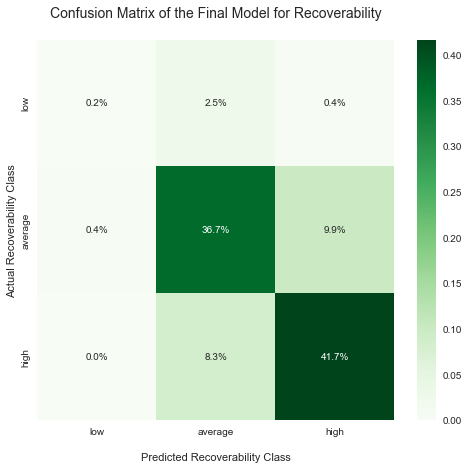

<Figure size 432x288 with 0 Axes>

In [65]:
# Final model confusion matrix heatmap
#URL: https://www.stackvidhya.com/plot-confusion-matrix-in-python-and-why/#:~:text=You%20can%20create%20the%20confusion%20matrix%20using%20the,Positives%2C%20False%20Negatives%2C%20and%20True%20negatives.%20%2A%2A%20Snippet%2A%2A

plt.subplots(figsize = (8,7))

ax = sns.heatmap(final_matrix/np.sum(final_matrix), annot=True, fmt='.1%', cmap='Greens')

ax.set_title('Confusion Matrix of the Final Model for Recoverability\n', fontsize = 14);
ax.set_xlabel('\nPredicted Recoverability Class')
ax.set_ylabel('Actual Recoverability Class');
ax.xaxis.set_ticklabels(['low','average', 'high'])
ax.yaxis.set_ticklabels(['low','average', 'high'])

plt.show()
#plt.savefig('figures/rec/Confusion Matrix of the Final Model for Recoverability.png')

In [93]:
# URL: https://pythonawesome.com/multi-class-confusion-matrix-library-in-python/#:~:text=PyCM%20is%20a%20multi-class%20confusion%20matrix%20library%20written,that%20supports%20most%20classes%20and%20overall%20statistics%20parameters.

from pycm import *
y_actu = Y_test['Rec_Class'].to_numpy()
y_pred = stack4_hv_y_pred
cm = ConfusionMatrix(actual_vector=y_actu, predict_vector=y_pred)
cm.classes
print(cm)

Predict   0         1         2         
Actual
0         3         48        7         

1         7         708       191       

2         0         160       803       





Overall Statistics : 

95% CI                                                            (0.76736,0.804)
ACC Macro                                                         0.85712
ARI                                                               0.36833
AUNP                                                              0.79357
AUNU                                                              0.70903
Bangdiwala B                                                      0.63869
Bennett S                                                         0.67852
CBA                                                               0.54228
CSI                                                               0.18072
Chi-Squared                                                       784.87989
Chi-Squared DF                                   

* AUC of class 0 is 0.52 which is poor.
* AUC of class 1 is 0.79 which is good.
* AUC of class 2 is 0.81 which is very good.
<br />
<br />
* F1 of class 0 is 0.09 which is poor.
* F1 of class 1 is 0.78 which is good.
* F1 of class 2 is 0.82 which is very good.
<br />
<br />
Class 0 - low recoverability/unrecoverable projects
Class 1 - average recoverability
Class 2 - highly recoverable projects

### 9.2  <a class="anchor" id="9_2"></a> ROC curve

In [45]:
#URL: https://stackoverflow.com/questions/45332410/roc-for-multiclass-classification

# Binarize the output
Y = label_binarize(Y, classes=[0, 1, 2])
n_classes = Y.shape[1]

# Learn to predict each class against the other
#RFC = RandomForestClassifier(100, random_state = 1)
FINAL = StackingClassifier(estimators=level4, final_estimator=hard_voting, cv=5)
OVRC = OneVsRestClassifier(FINAL)
OVRC.fit(X_train, Y_train)

Y = label_binarize(Y, classes=[0,1,2])
n_classes = 3

# shuffle and split training and test sets
X_train, X_test, Y_train, Y_test =\
    train_test_split(X, Y, test_size=0.2, random_state=1)

# classifier
y_score = OVRC.fit(X_train, Y_train).predict(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc='lower right')
    plt.show()

XGBoostError: value 0 for Parameter num_class should be greater equal to 1
num_class: Number of output class in the multi-class classification.

### 9.3  <a class="anchor" id="9_3"></a> Precision-recall curve

### 9.4  <a class="anchor" id="9_4"></a> Feature importance

In [ ]:
# Create a new DataFrame for feature importance
stack4_hv.feature_names = X.columns
final_feature_importance = pd.DataFrame({'Feature': final2_y_pred.feature_names,'Importance':final2.feature_importances_})
final_feature_importance = final_feature_importance.sort_values(by = ['Importance'], ascending = False)